In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
# data appears to be space-separated

df=pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data', sep='\s+', parse_dates=[[0,1,2]])
df.head()

C:\Users\raopo\AppData\Local\Temp\ipykernel_14464\2554048012.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data', sep='\s+', parse_dates=[[0,1,2]])


,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [122]:
df.shape

(6574, 13)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Yr_Mo_Dy  6574 non-null   datetime64[ns]
 1   RPT       6568 non-null   float64       
 2   VAL       6571 non-null   float64       
 3   ROS       6572 non-null   float64       
 4   KIL       6569 non-null   float64       
 5   SHA       6572 non-null   float64       
 6   BIR       6574 non-null   float64       
 7   DUB       6571 non-null   float64       
 8   CLA       6572 non-null   float64       
 9   MUL       6571 non-null   float64       
 10  CLO       6573 non-null   float64       
 11  BEL       6574 non-null   float64       
 12  MAL       6570 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 667.8 KB


In [124]:
df.describe()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6574,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,2042-03-23 06:48:57.389716992,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
min,1974-01-01 00:00:00,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
25%,1978-07-02 06:00:00,8.120000,6.670000,8.000000,3.580000,6.750000,4.000000,6.000000,5.090000,5.370000,5.330000,8.710000,10.710000
50%,2064-12-31 12:00:00,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
75%,2069-07-01 18:00:00,15.920000,14.040000,14.670000,8.420000,13.540000,9.670000,12.960000,11.420000,11.190000,11.630000,16.880000,19.830000
max,2073-12-31 00:00:00,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
std,NaN,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


In [125]:
df.duplicated().sum()

0

### Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [126]:
df['Yr_Mo_Dy'].dt.year.unique()

array([2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071,
       2072, 2073, 1974, 1975, 1976, 1977, 1978])

In [127]:
substract_100_days=lambda x: x-100 if (x.year and x != NaN) > 60 else x
df['Yr_Mo_Dy'] = df['Yr_Mo_Dy'].apply(subtract_100_years)

In [128]:
df['Yr_Mo_Dy']

0      1961-01-01
1      1961-01-02
2      1961-01-03
3      1961-01-04
4      1961-01-05
          ...    
6569   1978-12-27
6570   1978-12-28
6571   1978-12-29
6572   1978-12-30
6573   1978-12-31
Name: Yr_Mo_Dy, Length: 6574, dtype: datetime64[ns]

### Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [129]:
df.set_index('Yr_Mo_Dy')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [82]:
df['Yr_Mo_Dy'].dtype

dtype('<M8[ns]')

In [88]:
# <M8[ns] is a synonym for datetime64[ns]

### Compute how many values are missing for each location over the entire record.

In [97]:
missing=df.isnull().sum().reset_index()
missing = missing.rename(columns={'index':'column', 0:'missing_values'})
missing

,column,missing_values
0,Yr_Mo_Dy,0
1,RPT,6
2,VAL,3
3,ROS,2
4,KIL,5
5,SHA,2
6,BIR,0
7,DUB,3
8,CLA,2
9,MUL,3


<Axes: xlabel='column', ylabel='missing_values'>

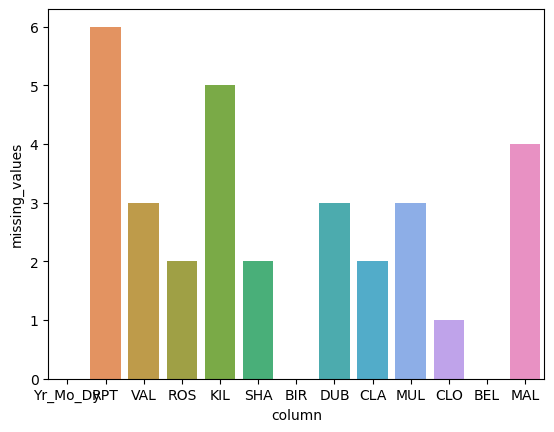

In [100]:
sns.barplot(data=missing, x='column', y='missing_values')

 ### Compute how many non-missing values there are in total.

In [104]:
df.count()

Yr_Mo_Dy    6574
RPT         6568
VAL         6571
ROS         6572
KIL         6569
SHA         6572
BIR         6574
DUB         6571
CLA         6572
MUL         6571
CLO         6573
BEL         6574
MAL         6570
dtype: int64

### Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days.

In [106]:
loc_stats=pd.DataFrame(df.describe())
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
25%,8.120000,6.670000,8.000000,3.580000,6.750000,4.000000,6.000000,5.090000,5.370000,5.330000,8.710000,10.710000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
75%,15.920000,14.040000,14.670000,8.420000,13.540000,9.670000,12.960000,11.420000,11.190000,11.630000,16.880000,19.830000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [115]:
loc_stats=loc_stats.drop(['count','25%','50%','75%'])
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


### Find the average windspeed in January for each location.

In [132]:
jan=df.copy()
jan['Month']=jan['Yr_Mo_Dy'].dt.month
jan.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Month
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1


In [139]:
jan=jan.groupby('Month').mean()
jan = jan.query("Month == 1")
jan

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Month,,,,,,,,,,,,,
1,1969-07-17 06:40:00,14.847325,12.91456,13.299624,7.199498,11.667734,8.054839,11.819355,9.512047,9.543208,10.053566,14.55052,18.028763


<Axes: >

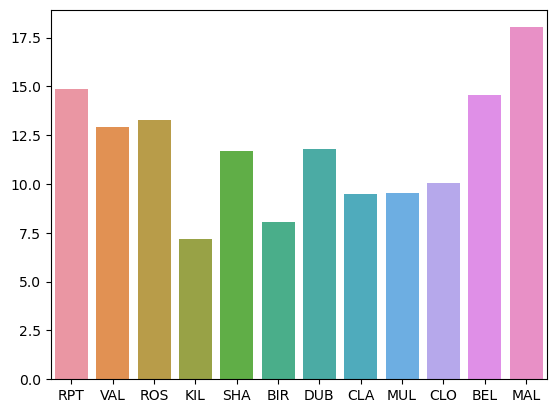

In [141]:
sns.barplot(jan)